In [156]:
from datetime import datetime
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Whole Twitter dataset

In [230]:
ab=os.listdir("location")
#print(len(ab))
path = "path"
os.chdir(path)

In [231]:
import glob

all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    frame = pd.read_csv(filename, usecols=["Absence of pleasure", "Depressed mood", "Insomnia", "Fatigue", "Weight loss",
                     "Feelings of worthlessness", "Diminished concentration", "Agitation",
                     "Suicidal thoughts", "Medication","Date", "ID"])
    li.append(frame)

df = pd.concat(li, axis=0, ignore_index=True)

In [232]:
df['Date'] = pd.to_datetime(df['Date']) # convert to datetime
df['Month'] = df['Date'].map(lambda x: x.month) # create column for month

In [233]:
df = df.drop(['Medication'], axis=1)

In [234]:
symptoms = df.iloc[:,0:9] # create table for symptoms
symptoms = symptoms[(df.T != 0).any()]
x = df.iloc[:,9:]
df = pd.concat([symptoms, x], axis=1)

In [235]:
print(df.shape)
df.head()

(399819, 12)


,Absence of pleasure,Depressed mood,Insomnia,Fatigue,Weight loss,Feelings of worthlessness,Diminished concentration,Agitation,Suicidal thoughts,Date,ID,Month
0,0,0,0,7,0,0,0,0,0,2016-03-30 18:11:43,5.983516e+08,3
1,0,0,0,1,0,0,0,0,0,2016-02-27 21:17:34,2.314724e+09,2
2,0,0,0,1,0,0,0,0,0,2016-01-05 14:36:51,1.717906e+08,1
3,0,0,0,0,0,1,0,0,0,2016-09-06 02:40:38,3.445366e+08,9
4,0,0,0,1,0,0,0,0,0,2016-06-29 12:43:26,6.066649e+08,6


In [44]:
df.sum()

Absence of pleasure          2.994900e+04
Depressed mood               9.754800e+04
Insomnia                     1.588100e+04
Fatigue                      1.331450e+05
Weight loss                  6.883000e+03
Feelings of worthlessness    5.875300e+04
Diminished concentration     2.000000e+04
Agitation                    5.408000e+04
Suicidal thoughts            1.930500e+04
ID                           3.963878e+14
Month                        2.383921e+06
dtype: float64

In [236]:
months = df.groupby('Month').sum()
months = months.iloc[:,0:10]

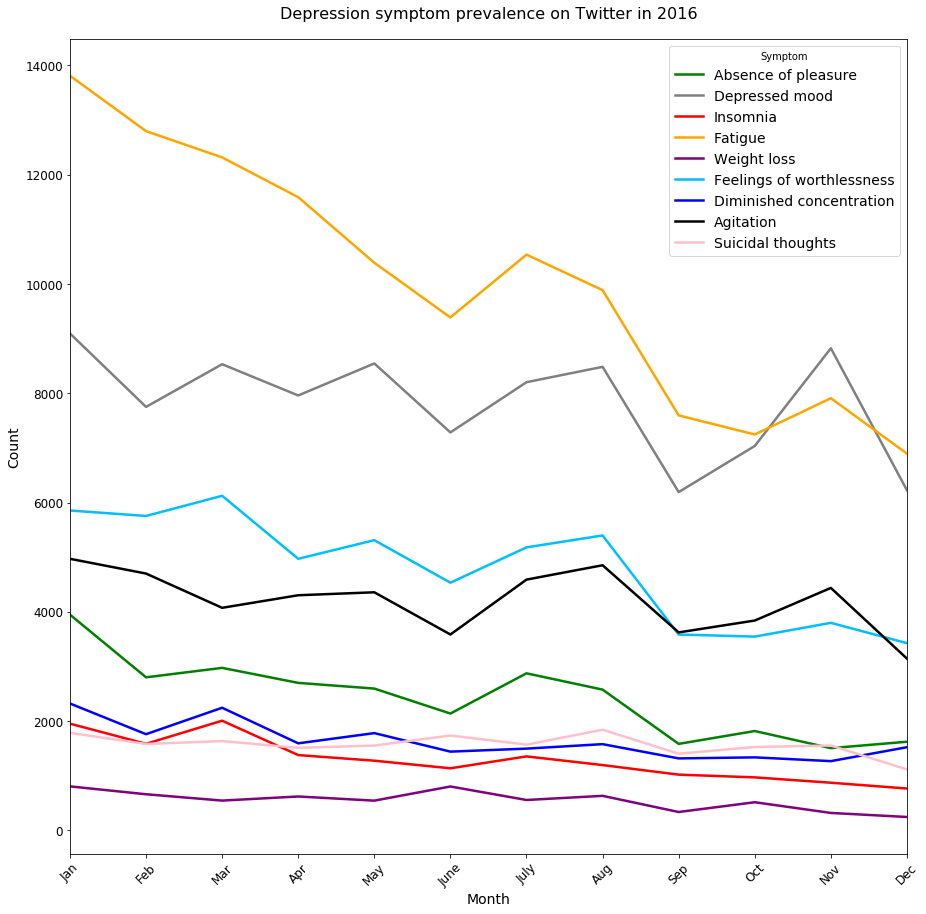

In [45]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# set figure
fig, ax = plt.subplots(figsize=(15, 15))

# set plot 
ax.plot(months["Absence of pleasure"], color = 'g', linewidth = 2.5)
ax.plot(months["Depressed mood"], color = 'grey', linewidth = 2.5)
ax.plot(months["Insomnia"], color = 'r', linewidth = 2.5)
ax.plot(months["Fatigue"], color = 'orange', linewidth = 2.5)
ax.plot(months["Weight loss"], color = 'purple', linewidth = 2.5)
ax.plot(months["Feelings of worthlessness"], color = 'deepskyblue', linewidth = 2.5)
ax.plot(months["Diminished concentration"], color = 'blue', linewidth = 2.5)
ax.plot(months["Agitation"], color = 'black', linewidth = 2.5)
ax.plot(months["Suicidal thoughts"], color = 'pink', linewidth = 2.5)
#ax.plot(months["Medication"], color = 'brown', linewidth = 2.5)

# set lables
ax.set_xlim([1,12])
ax.legend(title = 'Symptom', fontsize = 14)
ax.set_title('Depression symptom prevalence on Twitter in 2016', pad = 20, fontsize = 16)
ax.set_xlabel('Month', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ticks = np.arange(1,13,1)
labels = [i for i in month]
ax.set_xticks(ticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(labels, rotation=45);

In [326]:
df.head()

#Get table by season

df['Season'] = df['Month'].map(lambda x: ((x-3)%12 + 3)//3)
df.loc[df['Season'] == 1, 'Season'] = 'Spring'
df.loc[df['Season'] == 2, 'Season'] = 'Summer'
df.loc[df['Season'] == 3, 'Season'] = 'Autumn'
df.loc[df['Season'] == 4, 'Season'] = 'Winter'

seasons = df.groupby('Season').sum()
seasons = seasons.iloc[:,0:9].reset_index()
seasons.head()

,Season,Absence of pleasure,Depressed mood,Insomnia,Fatigue,Weight loss,Feelings of worthlessness,Diminished concentration,Agitation,Suicidal thoughts
0,Autumn,5001,22903,2925,25073,1225,11251,3997,13161,4591
1,Spring,8536,25936,4759,39040,1823,16730,5697,13440,4825
2,Summer,7747,24878,3758,32911,2055,15421,4589,13984,5307
3,Winter,8665,23831,4439,36121,1780,15351,5717,13495,4582


In [327]:
seasons = seasons.T

# get summer and winter values
x = seasons[2].values.tolist()
S = x[1:]

x = seasons[3].values.tolist()
W = x[1:]

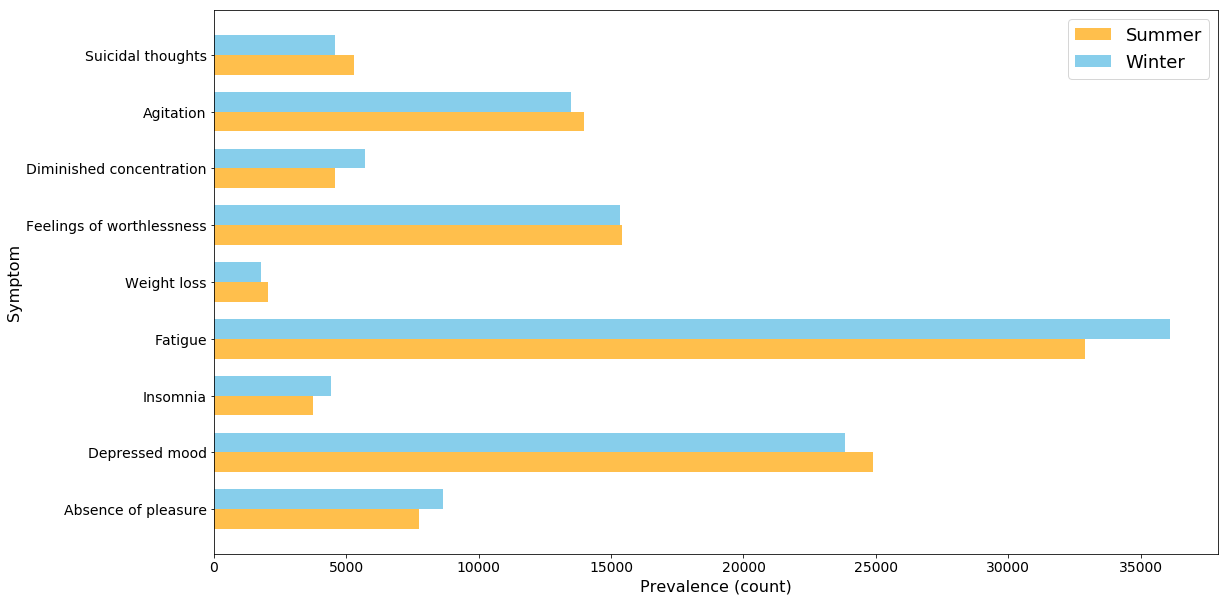

In [328]:
index = np.arange(9)
bar_width = 0.35

fig, ax = plt.subplots(figsize=(18,10))
summer = ax.barh(index, S, bar_width, label="Summer", color='orange', alpha = 0.7)

winter = ax.barh(index+bar_width, W, bar_width, label="Winter", color='skyblue')

ax.set_xlabel('Prevalence (count)', fontsize=16)
ax.set_ylabel('Symptom', fontsize=16)
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels( ["Absence of pleasure", "Depressed mood", "Insomnia", "Fatigue", "Weight loss",
                     "Feelings of worthlessness", "Diminished concentration", "Agitation",
                     "Suicidal thoughts"])
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=18)

plt.show()

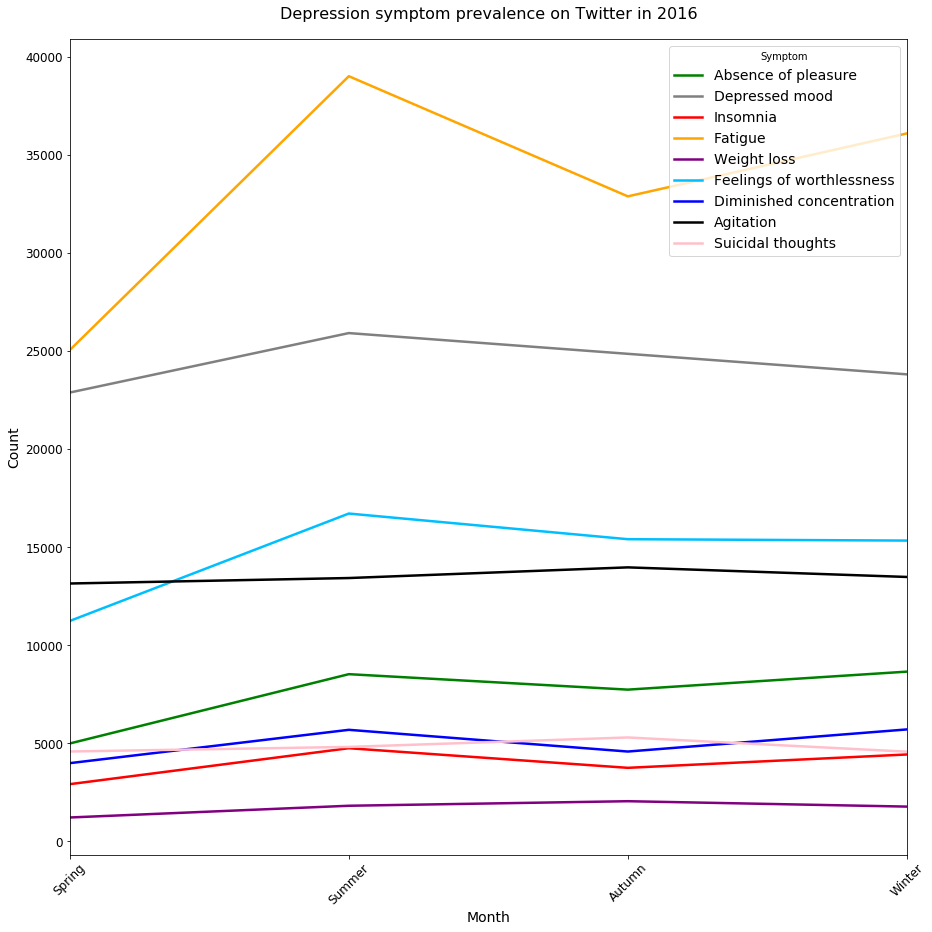

In [199]:
season = ['Spring', 'Summer', 'Autumn', 'Winter']

# set figure
fig, ax = plt.subplots(figsize=(15, 15))

# set plot 
ax.plot(seasons["Absence of pleasure"], color = 'g', linewidth = 2.5)
ax.plot(seasons["Depressed mood"], color = 'grey', linewidth = 2.5)
ax.plot(seasons["Insomnia"], color = 'r', linewidth = 2.5)
ax.plot(seasons["Fatigue"], color = 'orange', linewidth = 2.5)
ax.plot(seasons["Weight loss"], color = 'purple', linewidth = 2.5)
ax.plot(seasons["Feelings of worthlessness"], color = 'deepskyblue', linewidth = 2.5)
ax.plot(seasons["Diminished concentration"], color = 'blue', linewidth = 2.5)
ax.plot(seasons["Agitation"], color = 'black', linewidth = 2.5)
ax.plot(seasons["Suicidal thoughts"], color = 'pink', linewidth = 2.5)
#ax.plot(months["Medication"], color = 'brown', linewidth = 2.5)

# set lables
ax.set_xlim([0,3])
ax.legend(title = 'Symptom', fontsize = 14)
ax.set_title('Depression symptom prevalence on Twitter in 2016', pad = 20, fontsize = 16)
ax.set_xlabel('Month', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ticks = np.arange(0,4,1)
labels = [i for i in season]
ax.set_xticks(ticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(labels, rotation=45);

In [163]:
df['Week'] = df['Date'].map(lambda x: x.week) # create column for week

In [214]:
weeks = df.groupby('Week').sum()
weeks = weeks.iloc[:,0:10]
weeks.var()

Absence of pleasure          3.018838e+04
Depressed mood               1.386633e+05
Insomnia                     1.045308e+04
Fatigue                      4.207140e+05
Weight loss                  3.974155e+03
Feelings of worthlessness    7.359998e+04
Diminished concentration     1.226897e+04
Agitation                    4.392920e+04
Suicidal thoughts            6.481573e+03
ID                           3.013029e+24
dtype: float64

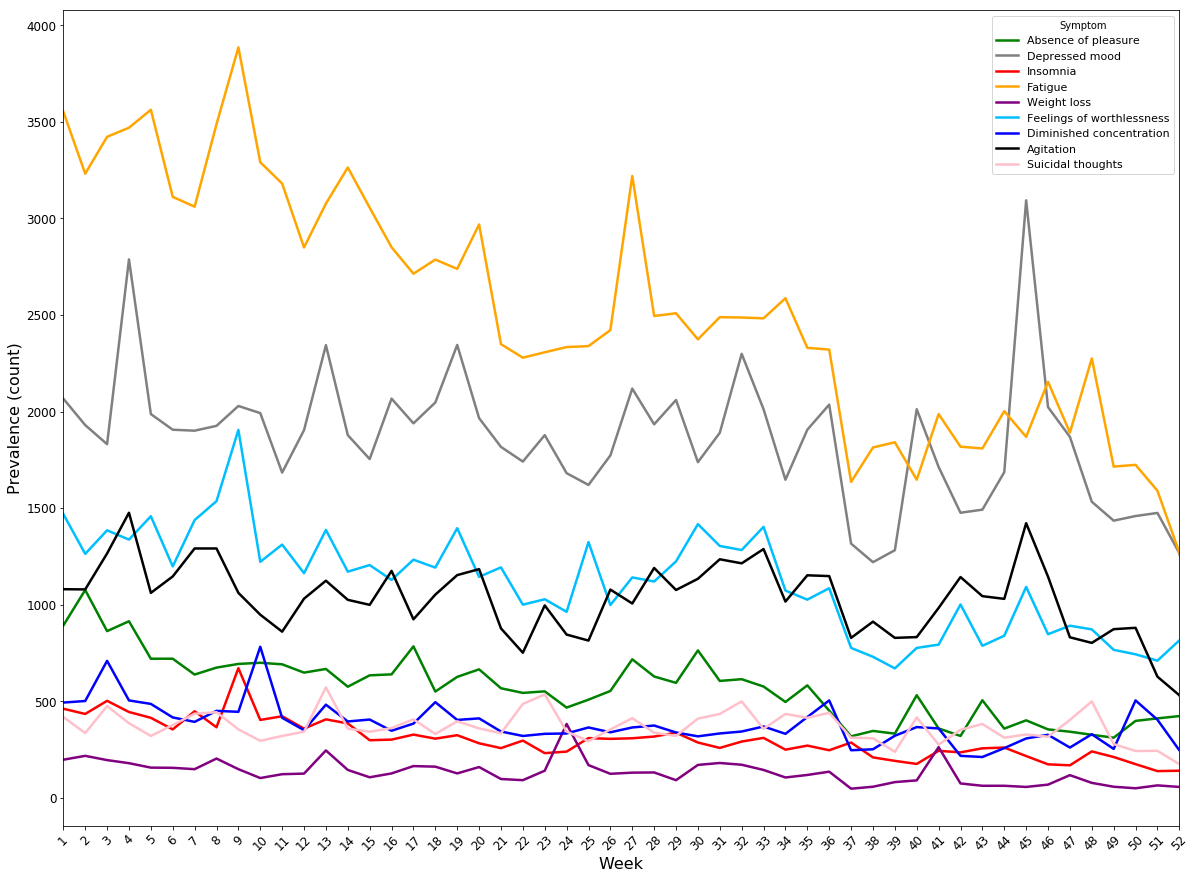

In [215]:
week = list(range(1,53))

# set figure
fig, ax = plt.subplots(figsize=(20, 15))

# set plot 
ax.plot(weeks["Absence of pleasure"], color = 'g', linewidth = 2.5)
ax.plot(weeks["Depressed mood"], color = 'grey', linewidth = 2.5)
ax.plot(weeks["Insomnia"], color = 'r', linewidth = 2.5)
ax.plot(weeks["Fatigue"], color = 'orange', linewidth = 2.5)
ax.plot(weeks["Weight loss"], color = 'purple', linewidth = 2.5)
ax.plot(weeks["Feelings of worthlessness"], color = 'deepskyblue', linewidth = 2.5)
ax.plot(weeks["Diminished concentration"], color = 'blue', linewidth = 2.5)
ax.plot(weeks["Agitation"], color = 'black', linewidth = 2.5)
ax.plot(weeks["Suicidal thoughts"], color = 'pink', linewidth = 2.5)
#ax.plot(weeks["Medication"], color = 'brown', linewidth = 2.5)

# set lables
ax.set_xlim([1,52])
ax.legend(title = 'Symptom', fontsize = 11)
#ax.set_title('Depression symptom prevalence on Twitter in 2016', pad = 20, fontsize = 16)
ax.set_xlabel('Week', fontsize = 16)
ax.set_ylabel('Prevalence (count)', fontsize = 16)
ticks = np.arange(1,53,1)
labels = [i for i in week]
ax.set_xticks(ticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(labels, rotation=45);

In [50]:
symptoms = df.iloc[:,0:9] # create table for symptoms
symptoms = symptoms.astype(bool).astype(int) # convert all non-zeros to 1
symptoms['sum'] = symptoms.sum(axis=1) 
index = symptoms['sum']>=2 
network_symptoms = symptoms[index] 
network_symptoms = network_symptoms.iloc[:,0:9]
network_symptoms.sum()

Absence of pleasure          2279
Depressed mood               9519
Insomnia                     2214
Fatigue                      6059
Weight loss                   545
Feelings of worthlessness    1977
Diminished concentration      836
Agitation                    7149
Suicidal thoughts            1872
dtype: int64

In [51]:
temp=[]
for row in network_symptoms.iterrows():
    index, data = row
    temp.append(data.tolist())

temp2 = []
for l in temp:
    data = [i+1 for i,x in enumerate(l) if x == 1]
    temp2.append(data)

temp2[0:5]

[[1, 3, 4], [2, 8], [2, 5], [2, 8], [4, 8]]

In [52]:
from itertools import combinations
from collections import Counter

count = Counter()

for sublist in temp2:
    count.update(Counter(combinations(sublist, 2)))

print(count)

Counter({(2, 8): 5632, (2, 4): 1687, (3, 4): 1514, (1, 4): 1271, (2, 9): 1109, (4, 8): 853, (2, 6): 666, (4, 6): 664, (1, 2): 510, (8, 9): 383, (3, 8): 303, (2, 3): 277, (6, 8): 269, (4, 9): 251, (2, 7): 239, (1, 8): 231, (2, 5): 220, (6, 9): 167, (1, 6): 153, (4, 7): 151, (7, 8): 142, (5, 7): 116, (3, 9): 108, (1, 3): 95, (6, 7): 95, (1, 7): 86, (5, 8): 85, (4, 5): 80, (5, 9): 53, (3, 6): 52, (3, 7): 49, (1, 9): 46, (5, 6): 38, (3, 5): 29, (7, 9): 21, (1, 5): 17})


In [53]:
final_df = pd.DataFrame.from_dict(count, orient='index').reset_index()
final_df.columns = ['tuple', 'count']

final_df[['S1', 'S2']] = pd.DataFrame(final_df['tuple'].tolist(), index=final_df.index)
final_df= final_df[['S1', 'S2', 'count']].sort_values('count', ascending=False)
final_df.head()

,S1,S2,count
3,2,8,5632
6,2,4,1687
2,3,4,1514
1,1,4,1271
7,2,9,1109


In [55]:
import networkx as nx

# create the graph by adding edges one by one
G = nx.Graph()
#G.add_nodes_from(symptoms_lst)

for index, row in final_df.iterrows():
    G.add_edge(row['S1'], row['S2'], weight=row['count'])

#print(G.degree())

# remove isolated vertices (if any)    
#remove = [node for node,degree in G.degree() if degree ==0]
#G.remove_nodes_from(remove)


mapping={1:'Absence of Pleasure', 2:'Depressed Mood', 3:'Insomnia', 4:'Fatigue', 5:'Weight Loss',
         6:'Feelings of Worthlessness', 7:'Diminished Concentration', 8: 'Agitation', 9: 'Suicidal Thoughts'}
G = nx.relabel_nodes(G,mapping, copy = False)

print(list(G))

['Absence of Pleasure', 'Depressed Mood', 'Insomnia', 'Fatigue', 'Weight Loss', 'Feelings of Worthlessness', 'Diminished Concentration', 'Agitation', 'Suicidal Thoughts']


In [56]:
# graph size
print("graph has %d nodes with %d edges" % (nx.number_of_nodes(G), nx.number_of_edges(G)))
print(nx.number_connected_components(G), "connected components")

# connected components
gsizes = [nx.number_of_nodes(glen) for glen in nx.connected_component_subgraphs(G)]
print("G connected component sizes:", sorted(gsizes, reverse=True))

graph has 9 nodes with 36 edges
1 connected components
G connected component sizes: [9]


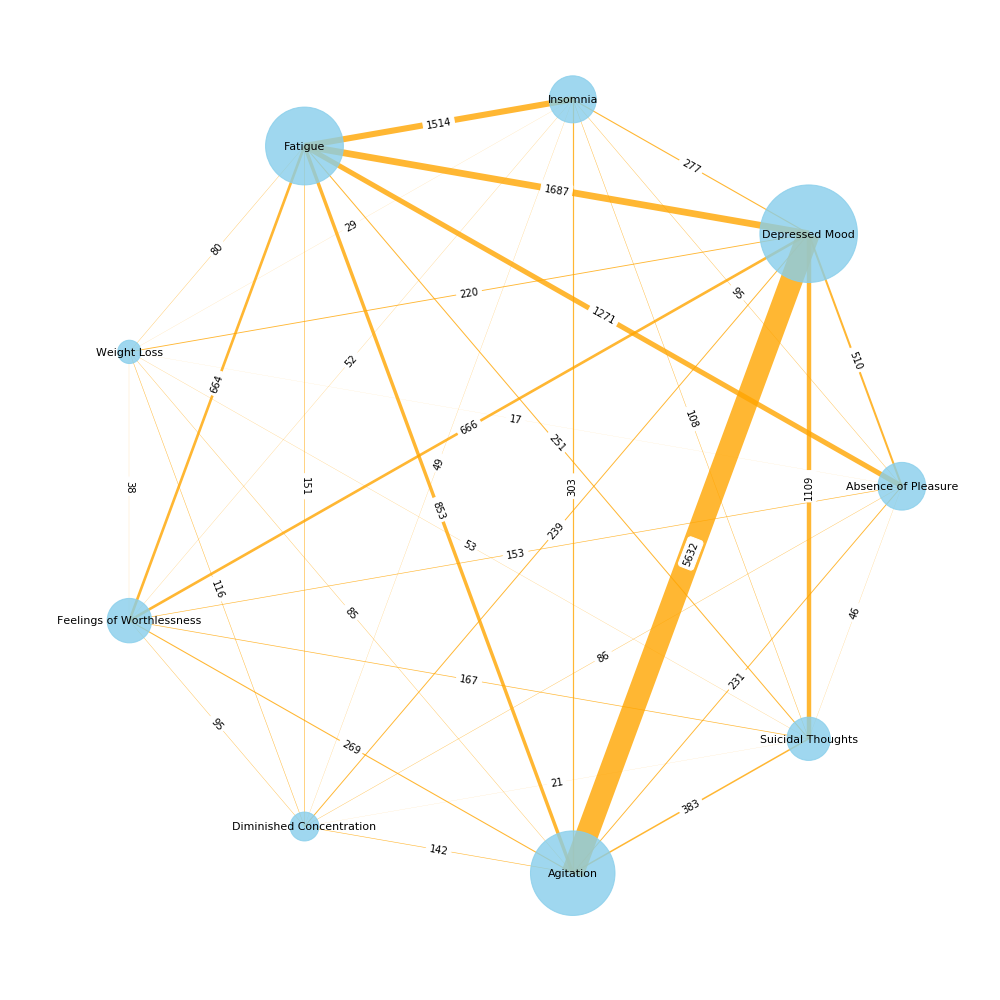

In [67]:
options = {
...     'node_color': 'red',
...     'edge_color': 'blue',
...     'node_size': 1600,
...     'width': 1,
...     'alpha': .5,
... }

sizes = network_symptoms.sum().tolist()

plt.subplots(figsize=(14,14))

pos=nx.circular_layout(G)  # note circular/spring might be more clear

weight = nx.get_edge_attributes(G, 'weight')

edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]
weig = []

for i in weights:
    weig.append(i*0.004)
    
nx.draw_networkx_labels(G, pos,font_size=11, font_family='sans-serif')
nx.draw(G, pos, node_size = sizes, width=weig, edge_color = 'orange', node_color = 'skyblue', alpha = 0.8)
nx.draw_networkx_edge_labels(G, pos, edge_labels = weight)

plt.tight_layout()
plt.margins(x=0.1, y=0.1)
plt.axis('off');
#plt.title('How many times are two depression symptoms mentioned in the same tweet?', fontsize = 20);

In [494]:
print(sizes)
list(G)

[2295, 9738, 2290, 6119, 568, 2010, 845, 7314, 1918, 743]


['Absence of Pleasure',
 'Depressed Mood',
 'Insomnia',
 'Fatigue',
 'Weight Loss',
 'Feelings of Worthlessness',
 'Diminished Concentration',
 'Agitation',
 'Suicidal Thoughts',
 'Medication']

# Anonymous Tweets

In [495]:
path = "path"
os.chdir(path)

In [496]:
df2 = pd.read_csv('users-data-df.csv')

In [497]:
df2.head()

,id_str,screen_name,name,description,followers_count,statuses_count,friends_count,created_at,location,lang,time_zone,status.id_str,status.created_at,status.text
0,370878219,BMachoK,Bob Machoko,Just another Berwynite trying to make it in th...,287,470,718,Fri Sep 09 19:58:16 +0000 2011,"Bewyn, Illinois",en,Central Time (US & Canada),4.278592e+17,Mon Jan 27 17:42:36 +0000 2014,12 Street Wings on #Yelp: I recently moved bac...
1,1149944095,gayboypoint,Kyle Point,Skype and snapchat: cockwhore2013 Realjock and...,361,316,515,Tue Feb 05 04:32:36 +0000 2013,new york city,en,Eastern Time (US & Canada),6.497762e+17,Fri Oct 02 02:41:32 +0000 2015,RT @98Invilla: http://t.co/oNkwS0pTcy
2,151267935,spark_23,martha guillen,"Extraño no equivale a enemigo, sino a amigo qu...",15,6,146,Thu Jun 03 01:06:03 +0000 2010,NaN,es,Mountain Time (US & Canada),4.713999e+17,Tue May 27 21:17:51 +0000 2014,ASI ES .. http://t.co/k9OqDn75j3
3,2984688982,CaioHenrique565,Caio Henrique,NaN,1,7,26,Sun Jan 18 21:04:14 +0000 2015,NaN,pt,Pacific Time (US & Canada),6.660638e+17,Mon Nov 16 01:22:46 +0000 2015,#BateOuRegaça
4,254294539,sallyjudithperd,sally judith perdomo,NaN,247,36,1483,Sat Feb 19 01:03:13 +0000 2011,colombia,es,Eastern Time (US & Canada),6.502846e+17,Sat Oct 03 12:21:55 +0000 2015,Just posted a photo https://t.co/q3ys5CQToT


In [510]:
df3 = df2[df2.followers_count > 30] # get df with only public tweets (i.e. remove accounts with less than 30 followers)
id_lst = df3['id_str'].tolist()
A_df = df[df['ID'].isin(id_lst)] # create anonymous df

print(len(id_lst))
print(A_df.shape)
print(df.shape)

314496
(383246, 14)
(399819, 14)


In [511]:
A_df.head()

,Absence of pleasure,Depressed mood,Insomnia,Fatigue,Weight loss,Feelings of worthlessness,Diminished concentration,Agitation,Suicidal thoughts,Medication,Date,ID,Month,Week
0,0,0,0,7,0,0,0,0,0,0,2016-03-30 18:11:43,5.983516e+08,3,13
1,0,0,0,1,0,0,0,0,0,0,2016-02-27 21:17:34,2.314724e+09,2,8
2,0,0,0,1,0,0,0,0,0,0,2016-01-05 14:36:51,1.717906e+08,1,1
3,0,0,0,0,0,1,0,0,0,0,2016-09-06 02:40:38,3.445366e+08,9,36
4,0,0,0,1,0,0,0,0,0,0,2016-06-29 12:43:26,6.066649e+08,6,26


In [505]:
A_df.sum()

Absence of pleasure          2.880300e+04
Depressed mood               9.283400e+04
Insomnia                     1.517700e+04
Fatigue                      1.286000e+05
Weight loss                  6.554000e+03
Feelings of worthlessness    5.625100e+04
Diminished concentration     1.914200e+04
Agitation                    5.171000e+04
Suicidal thoughts            1.847000e+04
Medication                   4.809000e+03
ID                           3.688703e+14
Month                        2.276478e+06
Week                         9.261794e+06
dtype: float64

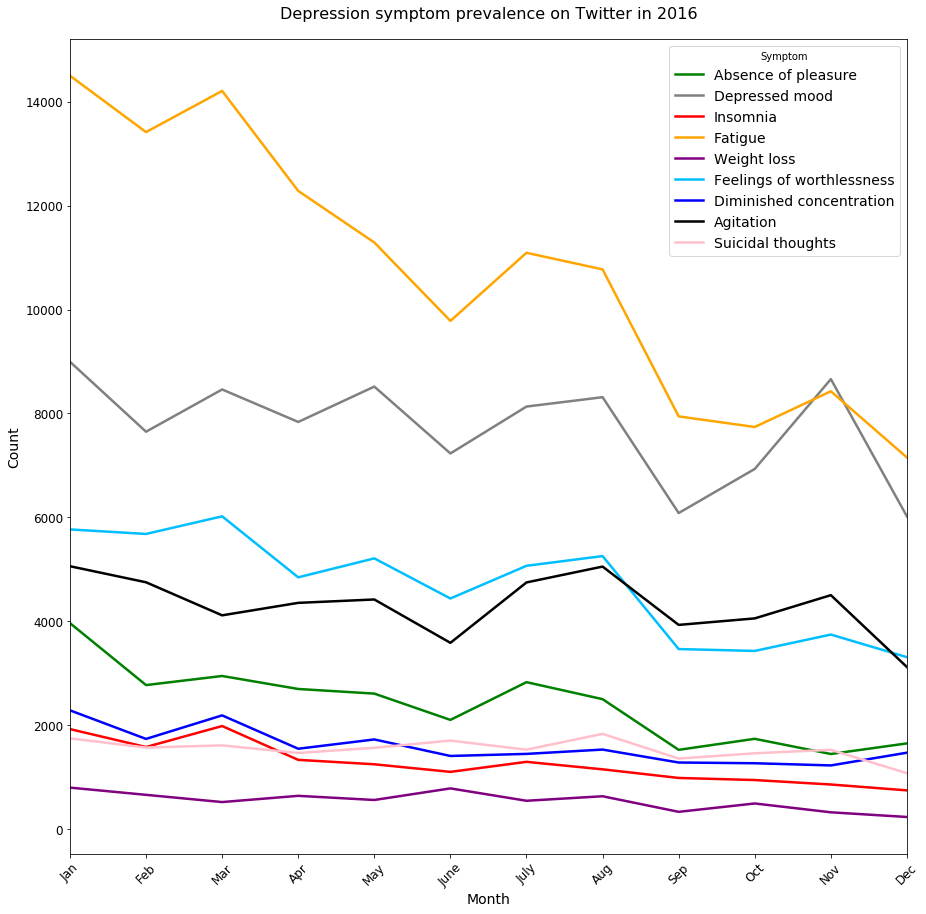

In [512]:
months = A_df.groupby('Month').sum()
months = months.iloc[:,0:10]

month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# set figure
fig, ax = plt.subplots(figsize=(15, 15))

# set plot 
ax.plot(months["Absence of pleasure"], color = 'g', linewidth = 2.5)
ax.plot(months["Depressed mood"], color = 'grey', linewidth = 2.5)
ax.plot(months["Insomnia"], color = 'r', linewidth = 2.5)
ax.plot(months["Fatigue"], color = 'orange', linewidth = 2.5)
ax.plot(months["Weight loss"], color = 'purple', linewidth = 2.5)
ax.plot(months["Feelings of worthlessness"], color = 'deepskyblue', linewidth = 2.5)
ax.plot(months["Diminished concentration"], color = 'blue', linewidth = 2.5)
ax.plot(months["Agitation"], color = 'black', linewidth = 2.5)
ax.plot(months["Suicidal thoughts"], color = 'pink', linewidth = 2.5)
#ax.plot(months["Medication"], color = 'brown', linewidth = 2.5)

# set lables
ax.set_xlim([1,12])
ax.legend(title = 'Symptom', fontsize = 14)
ax.set_title('Depression symptom prevalence on Twitter in 2016', pad = 20, fontsize = 16)
ax.set_xlabel('Month', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ticks = np.arange(1,13,1)
labels = [i for i in month]
ax.set_xticks(ticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(labels, rotation=45);

C:\Paresh\Anaconda1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


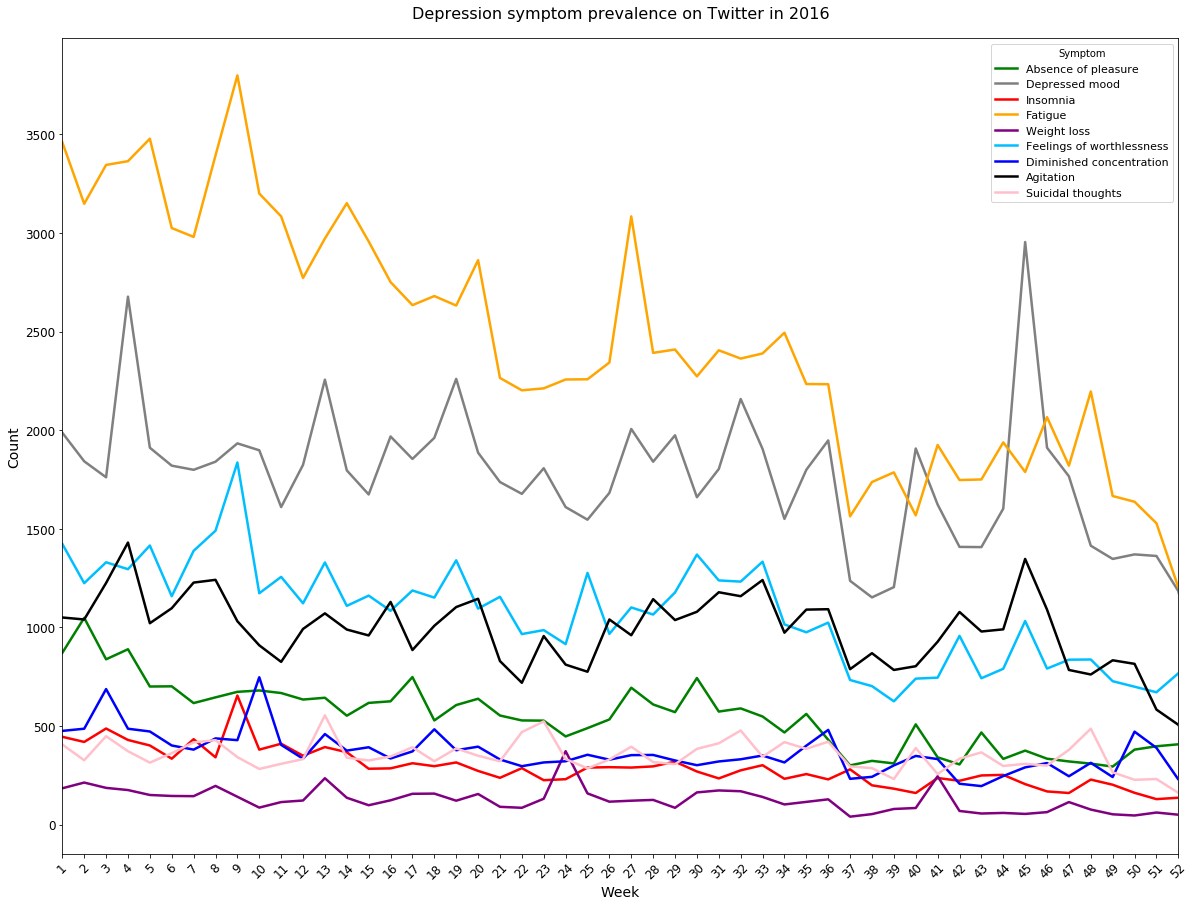

In [513]:
A_df['Week'] = A_df['Date'].map(lambda x: x.week) # create column for week

weeks = A_df.groupby('Week').sum()
weeks = weeks.iloc[:,0:10]

week = list(range(1,53))

# set figure
fig, ax = plt.subplots(figsize=(20, 15))

# set plot 
ax.plot(weeks["Absence of pleasure"], color = 'g', linewidth = 2.5)
ax.plot(weeks["Depressed mood"], color = 'grey', linewidth = 2.5)
ax.plot(weeks["Insomnia"], color = 'r', linewidth = 2.5)
ax.plot(weeks["Fatigue"], color = 'orange', linewidth = 2.5)
ax.plot(weeks["Weight loss"], color = 'purple', linewidth = 2.5)
ax.plot(weeks["Feelings of worthlessness"], color = 'deepskyblue', linewidth = 2.5)
ax.plot(weeks["Diminished concentration"], color = 'blue', linewidth = 2.5)
ax.plot(weeks["Agitation"], color = 'black', linewidth = 2.5)
ax.plot(weeks["Suicidal thoughts"], color = 'pink', linewidth = 2.5)
#ax.plot(weeks["Medication"], color = 'brown', linewidth = 2.5)

# set lables
ax.set_xlim([1,52])
ax.legend(title = 'Symptom', fontsize = 11)
ax.set_title('Depression symptom prevalence on Twitter in 2016', pad = 20, fontsize = 16)
ax.set_xlabel('Week', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ticks = np.arange(1,53,1)
labels = [i for i in week]
ax.set_xticks(ticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(labels, rotation=45);

In [515]:
symptoms = A_df.iloc[:,0:10] # create table for symptoms
symptoms = symptoms.astype(bool).astype(int) # convert all non-zeros to 1
symptoms['sum'] = symptoms.sum(axis=1) 
index = symptoms['sum']>=2 
network_symptoms = symptoms[index] 
network_symptoms = network_symptoms.iloc[:,0:10]
network_symptoms.sum()

Absence of pleasure          2182
Depressed mood               9277
Insomnia                     2175
Fatigue                      5858
Weight loss                   546
Feelings of worthlessness    1918
Diminished concentration      795
Agitation                    7009
Suicidal thoughts            1833
Medication                    686
dtype: int64

In [516]:
temp=[]
for row in network_symptoms.iterrows():
    index, data = row
    temp.append(data.tolist())

temp2 = []
for l in temp:
    data = [i+1 for i,x in enumerate(l) if x == 1]
    temp2.append(data)

temp2[0:5]

[[1, 3, 4], [2, 8], [2, 5], [2, 8], [4, 8]]

In [517]:
from itertools import combinations
from collections import Counter

count = Counter()

for sublist in temp2:
    count.update(Counter(combinations(sublist, 2)))

print(count)

Counter({(2, 8): 5398, (2, 4): 1623, (3, 4): 1437, (1, 4): 1209, (2, 9): 1062, (4, 8): 822, (4, 6): 641, (2, 6): 620, (1, 2): 479, (8, 9): 366, (3, 8): 294, (2, 10): 258, (6, 8): 255, (2, 3): 254, (4, 9): 241, (1, 8): 222, (8, 10): 221, (2, 7): 214, (2, 5): 211, (6, 9): 160, (1, 6): 150, (4, 7): 146, (7, 8): 136, (5, 7): 115, (3, 9): 103, (1, 3): 90, (6, 7): 90, (3, 10): 84, (1, 7): 81, (5, 8): 79, (4, 5): 76, (4, 10): 72, (9, 10): 51, (5, 9): 51, (3, 6): 51, (3, 7): 46, (1, 9): 44, (6, 10): 36, (5, 6): 36, (3, 5): 27, (5, 10): 23, (1, 10): 21, (7, 9): 18, (1, 5): 17, (7, 10): 9})


In [518]:
final_df = pd.DataFrame.from_dict(count, orient='index').reset_index()
final_df.columns = ['tuple', 'count']

final_df[['S1', 'S2']] = pd.DataFrame(final_df['tuple'].tolist(), index=final_df.index)
final_df= final_df[['S1', 'S2', 'count']].sort_values('count', ascending=False)
final_df.head()

,S1,S2,count
3,2,8,5398
6,2,4,1623
2,3,4,1437
1,1,4,1209
7,2,9,1062


In [519]:
import networkx as nx

# create the graph by adding edges one by one
G = nx.Graph()
#G.add_nodes_from(symptoms_lst)

for index, row in final_df.iterrows():
    G.add_edge(row['S1'], row['S2'], weight=row['count'])

#print(G.degree())

# remove isolated vertices (if any)    
#remove = [node for node,degree in G.degree() if degree ==0]
#G.remove_nodes_from(remove)


mapping={1:'Absence of Pleasure', 2:'Depressed Mood', 3:'Insomnia', 4:'Fatigue', 5:'Weight Loss',
         6:'Feelings of Worthlessness', 7:'Diminished Concentration', 8: 'Agitation', 9: 'Suicidal Thoughts',
        10: 'Medication'}
G = nx.relabel_nodes(G,mapping, copy = False)

print(list(G))

['Absence of Pleasure', 'Depressed Mood', 'Insomnia', 'Fatigue', 'Weight Loss', 'Feelings of Worthlessness', 'Diminished Concentration', 'Agitation', 'Suicidal Thoughts', 'Medication']


In [520]:
# graph size
print("graph has %d nodes with %d edges" % (nx.number_of_nodes(G), nx.number_of_edges(G)))
print(nx.number_connected_components(G), "connected components")

# connected components
gsizes = [nx.number_of_nodes(glen) for glen in nx.connected_component_subgraphs(G)]
print("G connected component sizes:", sorted(gsizes, reverse=True))

graph has 10 nodes with 45 edges
1 connected components
G connected component sizes: [10]


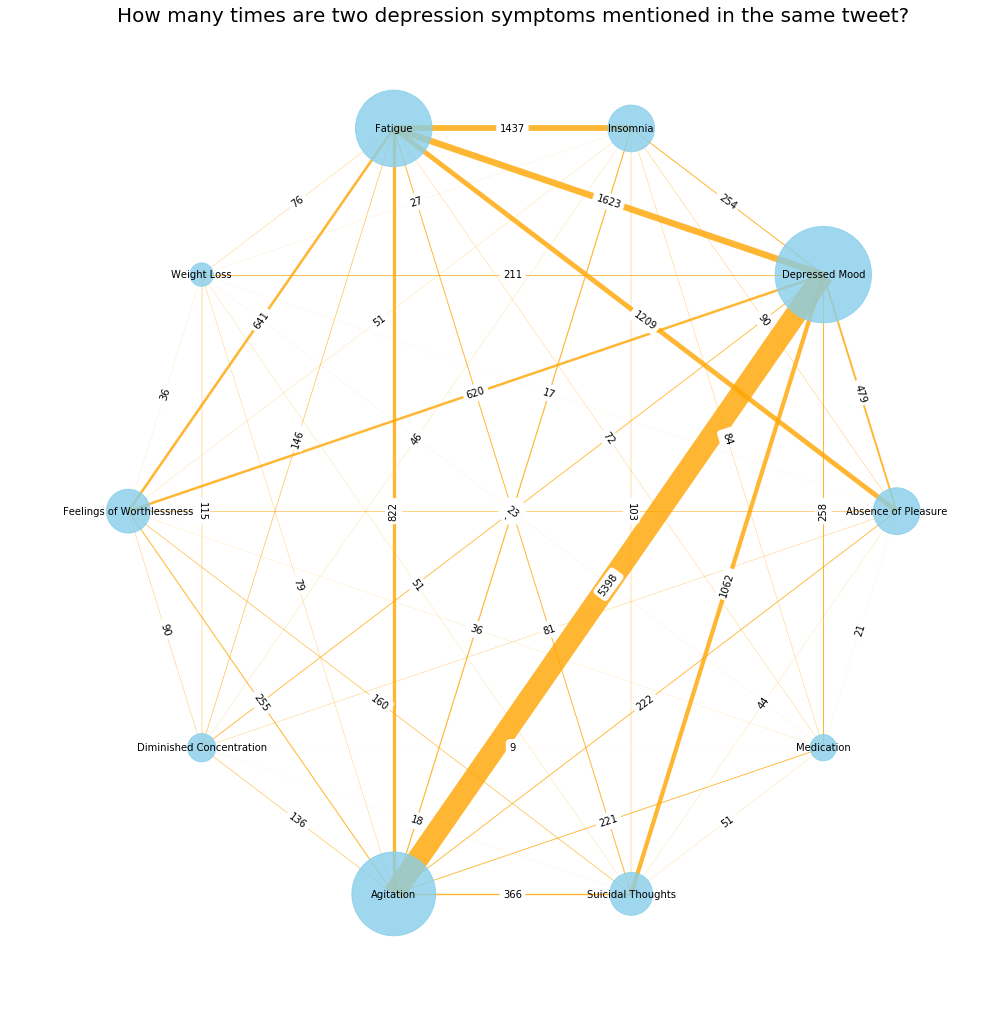

In [521]:
options = {
...     'node_color': 'red',
...     'edge_color': 'blue',
...     'node_size': 1600,
...     'width': 1,
...     'alpha': .5,
... }

sizes = network_symptoms.sum().tolist()

plt.subplots(figsize=(14,14))

pos=nx.circular_layout(G)  # note circular/spring might be more clear

weight = nx.get_edge_attributes(G, 'weight')

edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]
weig = []

for i in weights:
    weig.append(i*0.004)
    
nx.draw_networkx_labels(G, pos,font_size=10, font_family='sans-serif')
nx.draw(G, pos, node_size = sizes, width=weig, edge_color = 'orange', node_color = 'skyblue', alpha = 0.8)
nx.draw_networkx_edge_labels(G, pos, edge_labels = weight)

plt.tight_layout()
plt.margins(x=0.1, y=0.1)
plt.axis('off');
plt.title('How many times are two depression symptoms mentioned in the same tweet?', fontsize = 20);

In [522]:
print(sizes)
list(G)

[2182, 9277, 2175, 5858, 546, 1918, 795, 7009, 1833, 686]


['Absence of Pleasure',
 'Depressed Mood',
 'Insomnia',
 'Fatigue',
 'Weight Loss',
 'Feelings of Worthlessness',
 'Diminished Concentration',
 'Agitation',
 'Suicidal Thoughts',
 'Medication']

# Reddit

In [206]:
path = "path"
os.chdir(path)

In [207]:
R_df = pd.read_csv('reddit_dict_dfm.csv', usecols=["Absence of pleasure", "Depressed mood", "Insomnia", "Fatigue", "Weight loss",
                     "Feelings of worthlessness", "Diminished concentration", "Agitation",
                     "Suicidal thoughts", "Medication","Date"])

R_df.head()

,Absence of pleasure,Depressed mood,Insomnia,Fatigue,Weight loss,Feelings of worthlessness,Diminished concentration,Agitation,Suicidal thoughts,Medication,Date
0,0,1,0,0,0,0,0,0,0,0,01/01/2016 00:00
1,0,1,0,0,0,0,0,0,0,0,01/01/2016 00:18
2,0,1,0,0,0,0,0,1,0,0,01/01/2016 00:23
3,0,3,0,0,0,0,0,0,0,0,01/01/2016 00:30
4,0,1,0,0,0,0,0,0,0,0,01/01/2016 00:33


In [208]:
R_df['Date'] = pd.to_datetime(R_df['Date']) # convert to datetime
R_df['Month'] = R_df['Date'].map(lambda x: x.month) # create column for month

In [72]:
print(R_df.shape)
R_df.head()

(80886, 12)


,Absence of pleasure,Depressed mood,Insomnia,Fatigue,Weight loss,Feelings of worthlessness,Diminished concentration,Agitation,Suicidal thoughts,Medication,Date,Month
0,0,1,0,0,0,0,0,0,0,0,2016-01-01 00:00:00,1
1,0,1,0,0,0,0,0,0,0,0,2016-01-01 00:18:00,1
2,0,1,0,0,0,0,0,1,0,0,2016-01-01 00:23:00,1
3,0,3,0,0,0,0,0,0,0,0,2016-01-01 00:30:00,1
4,0,1,0,0,0,0,0,0,0,0,2016-01-01 00:33:00,1


In [73]:
R_df.sum()

Absence of pleasure            7479
Depressed mood                73853
Insomnia                       1618
Fatigue                        8042
Weight loss                    1559
Feelings of worthlessness     12203
Diminished concentration       3037
Agitation                     15654
Suicidal thoughts             13254
Medication                    12671
Month                        543384
dtype: int64

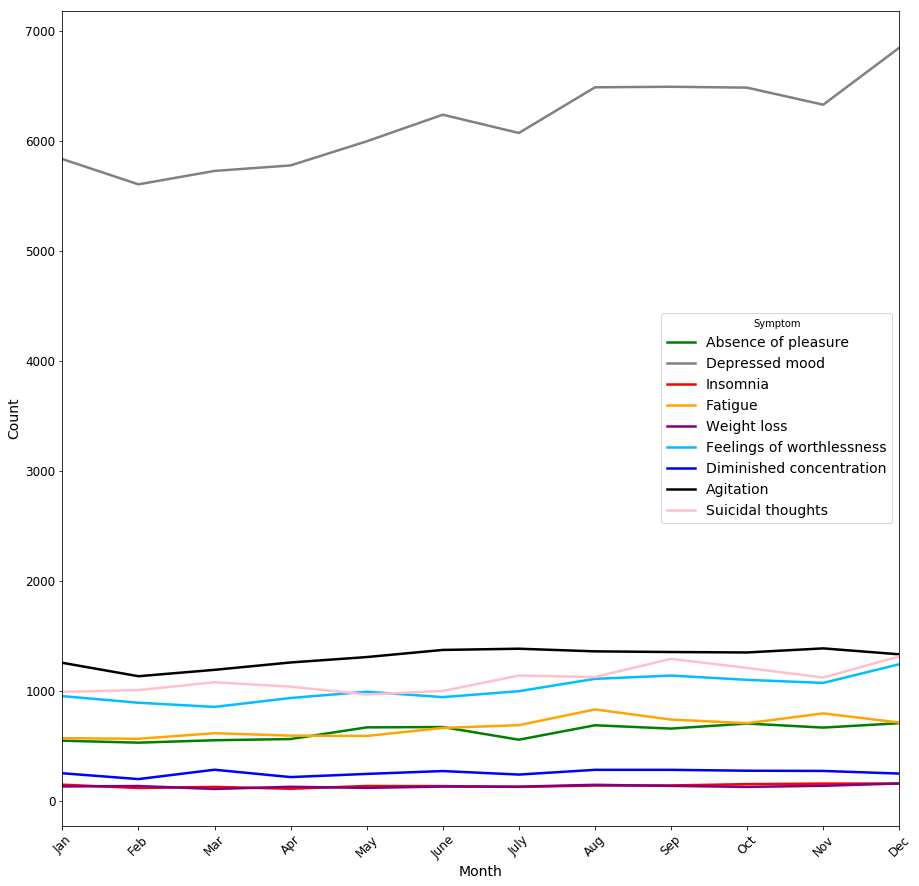

In [75]:
months = R_df.groupby('Month').sum()
months = months.iloc[:,0:10]

month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# set figure
fig, ax = plt.subplots(figsize=(15, 15))

# set plot 
ax.plot(months["Absence of pleasure"], color = 'g', linewidth = 2.5)
ax.plot(months["Depressed mood"], color = 'grey', linewidth = 2.5)
ax.plot(months["Insomnia"], color = 'r', linewidth = 2.5)
ax.plot(months["Fatigue"], color = 'orange', linewidth = 2.5)
ax.plot(months["Weight loss"], color = 'purple', linewidth = 2.5)
ax.plot(months["Feelings of worthlessness"], color = 'deepskyblue', linewidth = 2.5)
ax.plot(months["Diminished concentration"], color = 'blue', linewidth = 2.5)
ax.plot(months["Agitation"], color = 'black', linewidth = 2.5)
ax.plot(months["Suicidal thoughts"], color = 'pink', linewidth = 2.5)
#ax.plot(months["Medication"], color = 'brown', linewidth = 2.5)

# set lables
ax.set_xlim([1,12])
ax.legend(title = 'Symptom', fontsize = 14)
#ax.set_title('Depression symptom prevalence on Reddit in 2016', pad = 20, fontsize = 16)
ax.set_xlabel('Month', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ticks = np.arange(1,13,1)
labels = [i for i in month]
ax.set_xticks(ticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(labels, rotation=45);

In [319]:
R_df.head()

#Get table by season

R_df['Season'] = R_df['Month'].map(lambda x: ((x-3)%12 + 3)//3)
R_df.loc[R_df['Season'] == 1, 'Season'] = 'Spring'
R_df.loc[R_df['Season'] == 2, 'Season'] = 'Summer'
R_df.loc[R_df['Season'] == 3, 'Season'] = 'Autumn'
R_df.loc[R_df['Season'] == 4, 'Season'] = 'Winter'

seasons = R_df.groupby('Season').sum()
seasons = seasons.iloc[:,0:9].reset_index()
seasons.head()

,Season,Absence of pleasure,Depressed mood,Insomnia,Fatigue,Weight loss,Feelings of worthlessness,Diminished concentration,Agitation,Suicidal thoughts
0,Autumn,2020,19296,443,2234,394,3305,822,4082,3614
1,Spring,1775,17491,366,1792,348,2775,738,3750,3077
2,Summer,1908,18788,394,2176,399,3043,786,4108,3258
3,Winter,1776,18278,415,1840,418,3080,691,3714,3305


In [320]:
seasons = seasons.T

# get summer and winter values
x = seasons[2].values.tolist()
S = x[1:]

x = seasons[3].values.tolist()
W = x[1:]

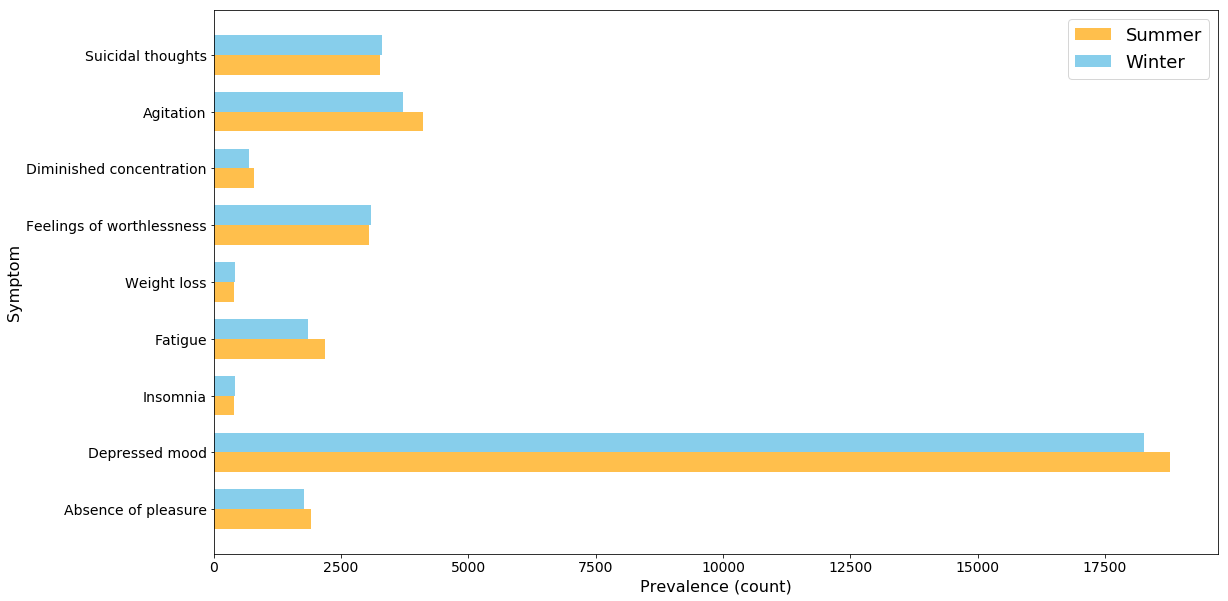

In [325]:
index = np.arange(9)
bar_width = 0.35

fig, ax = plt.subplots(figsize=(18,10))
summer = ax.barh(index, S, bar_width, label="Summer", color='orange', alpha = 0.7)

winter = ax.barh(index+bar_width, W, bar_width, label="Winter", color='skyblue')

ax.set_xlabel('Prevalence (count)', fontsize=16)
ax.set_ylabel('Symptom', fontsize=16)
ax.set_yticks(index + bar_width / 2)
ax.set_yticklabels( ["Absence of pleasure", "Depressed mood", "Insomnia", "Fatigue", "Weight loss",
                     "Feelings of worthlessness", "Diminished concentration", "Agitation",
                     "Suicidal thoughts"])
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=18)

plt.show()

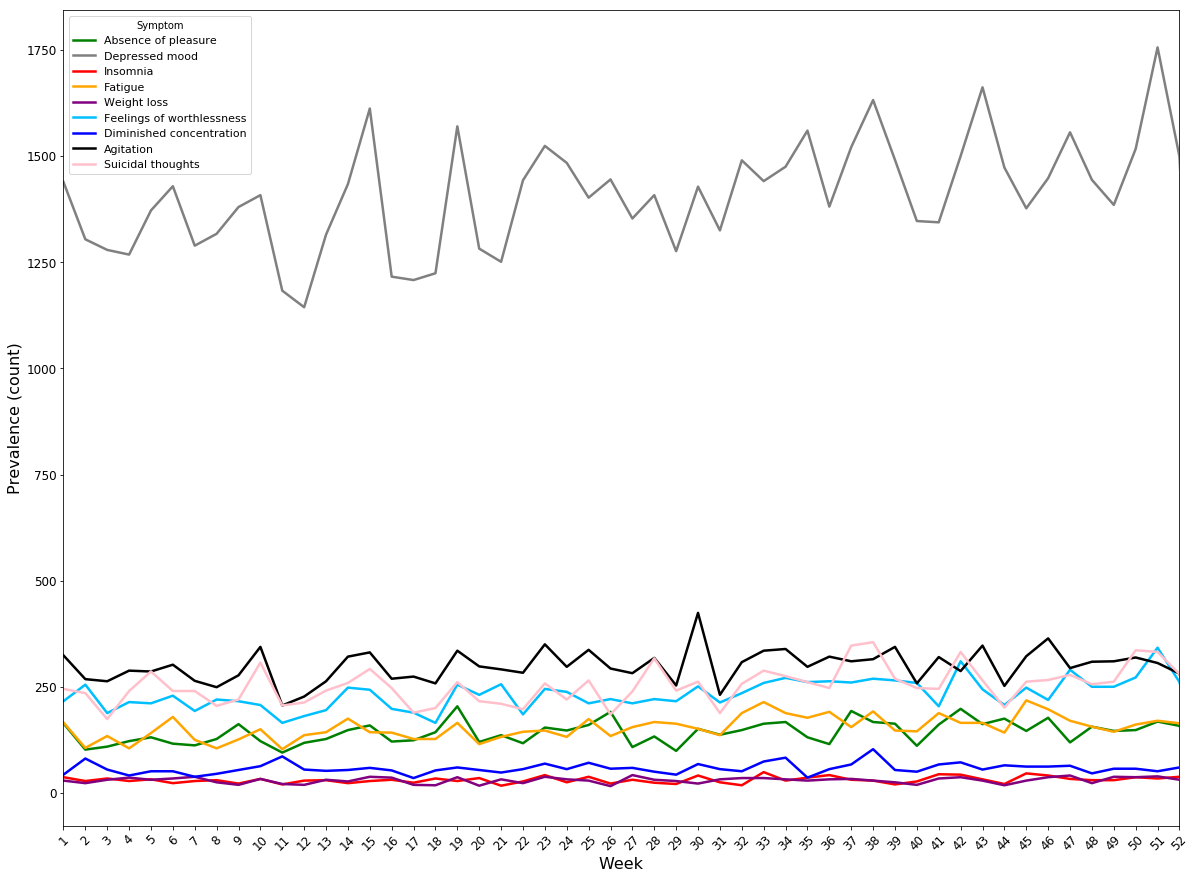

In [212]:
R_df['Week'] = R_df['Date'].map(lambda x: x.week) # create column for week

weeks = R_df.groupby('Week').sum()
weeks = weeks.iloc[:,0:10]

week = list(range(1,53))

# set figure
fig, ax = plt.subplots(figsize=(20, 15))

# set plot 
ax.plot(weeks["Absence of pleasure"], color = 'g', linewidth = 2.5)
ax.plot(weeks["Depressed mood"], color = 'grey', linewidth = 2.5)
ax.plot(weeks["Insomnia"], color = 'r', linewidth = 2.5)
ax.plot(weeks["Fatigue"], color = 'orange', linewidth = 2.5)
ax.plot(weeks["Weight loss"], color = 'purple', linewidth = 2.5)
ax.plot(weeks["Feelings of worthlessness"], color = 'deepskyblue', linewidth = 2.5)
ax.plot(weeks["Diminished concentration"], color = 'blue', linewidth = 2.5)
ax.plot(weeks["Agitation"], color = 'black', linewidth = 2.5)
ax.plot(weeks["Suicidal thoughts"], color = 'pink', linewidth = 2.5)
#ax.plot(weeks["Medication"], color = 'brown', linewidth = 2.5)

# set lables
ax.set_xlim([1,52])
ax.legend(title = 'Symptom', fontsize = 11)
#ax.set_title('Depression symptom prevalence on Reddit in 2016', pad = 20, fontsize = 16)
ax.set_xlabel('Week', fontsize = 16)
ax.set_ylabel('Prevalence (count)', fontsize = 16)
ticks = np.arange(1,53,1)
labels = [i for i in week]
ax.set_xticks(ticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(labels, rotation=45);

In [546]:
symptoms = R_df.iloc[:,0:10] # create table for symptoms
symptoms = symptoms.astype(bool).astype(int) # convert all non-zeros to 1
symptoms['sum'] = symptoms.sum(axis=1) 
index = symptoms['sum']>=2 
network_symptoms = symptoms[index] 
network_symptoms = network_symptoms.iloc[:,0:10]
network_symptoms.sum()

Absence of pleasure           3548
Depressed mood               17903
Insomnia                       967
Fatigue                       3912
Weight loss                    778
Feelings of worthlessness     4938
Diminished concentration      1383
Agitation                     7653
Suicidal thoughts             5505
Medication                    4673
dtype: int64

In [547]:
temp=[]
for row in network_symptoms.iterrows():
    index, data = row
    temp.append(data.tolist())

temp2 = []
for l in temp:
    data = [i+1 for i,x in enumerate(l) if x == 1]
    temp2.append(data)

temp2[0:5]

[[2, 8], [2, 3, 8], [2, 4], [2, 4], [2, 8]]

In [574]:
from itertools import combinations
from collections import Counter

count = Counter()

for sublist in temp2:
    count.update(Counter(combinations(sublist, 2)))

print(count)

Counter({(2, 8): 6057, (2, 9): 3886, (2, 6): 3405, (2, 10): 3133, (2, 4): 2611, (1, 2): 2455, (8, 10): 1261, (2, 7): 903, (6, 9): 900, (8, 9): 883, (6, 8): 872, (9, 10): 855, (4, 8): 708, (1, 8): 626, (4, 6): 604, (1, 4): 598, (4, 9): 528, (2, 3): 520, (2, 5): 498, (4, 10): 497, (1, 6): 481, (1, 9): 445, (1, 10): 401, (6, 10): 367, (3, 10): 288, (7, 8): 263, (3, 8): 261, (3, 4): 247, (6, 7): 211, (1, 7): 180, (7, 9): 180, (4, 7): 176, (5, 10): 172, (5, 8): 171, (7, 10): 149, (5, 6): 146, (3, 9): 127, (4, 5): 109, (1, 3): 99, (5, 9): 83, (3, 6): 77, (1, 5): 56, (3, 5): 37, (3, 7): 35, (5, 7): 33})


In [568]:
final_df = pd.DataFrame.from_dict(count, orient='index').reset_index()
final_df.columns = ['tuple', 'count']

final_df[['S1', 'S2']] = pd.DataFrame(final_df['tuple'].tolist(), index=final_df.index)
final_df= final_df[['S1', 'S2', 'count']].sort_values('count', ascending=False)
final_df.head()

,S1,S2,count
0,2,8,6057
6,2,9,3886
7,2,6,3405
9,2,10,3133
3,2,4,2611


In [585]:
import networkx as nx

# create the graph by adding edges one by one
G = nx.Graph()
#G.add_nodes_from(symptoms_lst)

for index, row in final_df.iterrows():
    G.add_edge(row['S1'], row['S2'], weight=row['count'])

#print(G.degree())

# remove isolated vertices (if any)    
#remove = [node for node,degree in G.degree() if degree ==0]
#G.remove_nodes_from(remove)

mapping={1:'Absence of Pleasure', 2:'Depressed Mood', 3:'Insomnia', 4:'Fatigue', 5:'Weight Loss',
         6:'Feelings of Worthlessness', 7:'Diminished Concentration', 8: 'Agitation', 9: 'Suicidal Thoughts',
        10: 'Medication'}
G = nx.relabel_nodes(G,mapping, copy = False)

print(list(G))

['Absence of Pleasure', 'Depressed Mood', 'Insomnia', 'Fatigue', 'Weight Loss', 'Feelings of Worthlessness', 'Diminished Concentration', 'Agitation', 'Suicidal Thoughts', 'Medication']


In [551]:
# graph size
print("graph has %d nodes with %d edges" % (nx.number_of_nodes(G), nx.number_of_edges(G)))
print(nx.number_connected_components(G), "connected components")

# connected components
gsizes = [nx.number_of_nodes(glen) for glen in nx.connected_component_subgraphs(G)]
print("G connected component sizes:", sorted(gsizes, reverse=True))

graph has 10 nodes with 45 edges
1 connected components
G connected component sizes: [10]


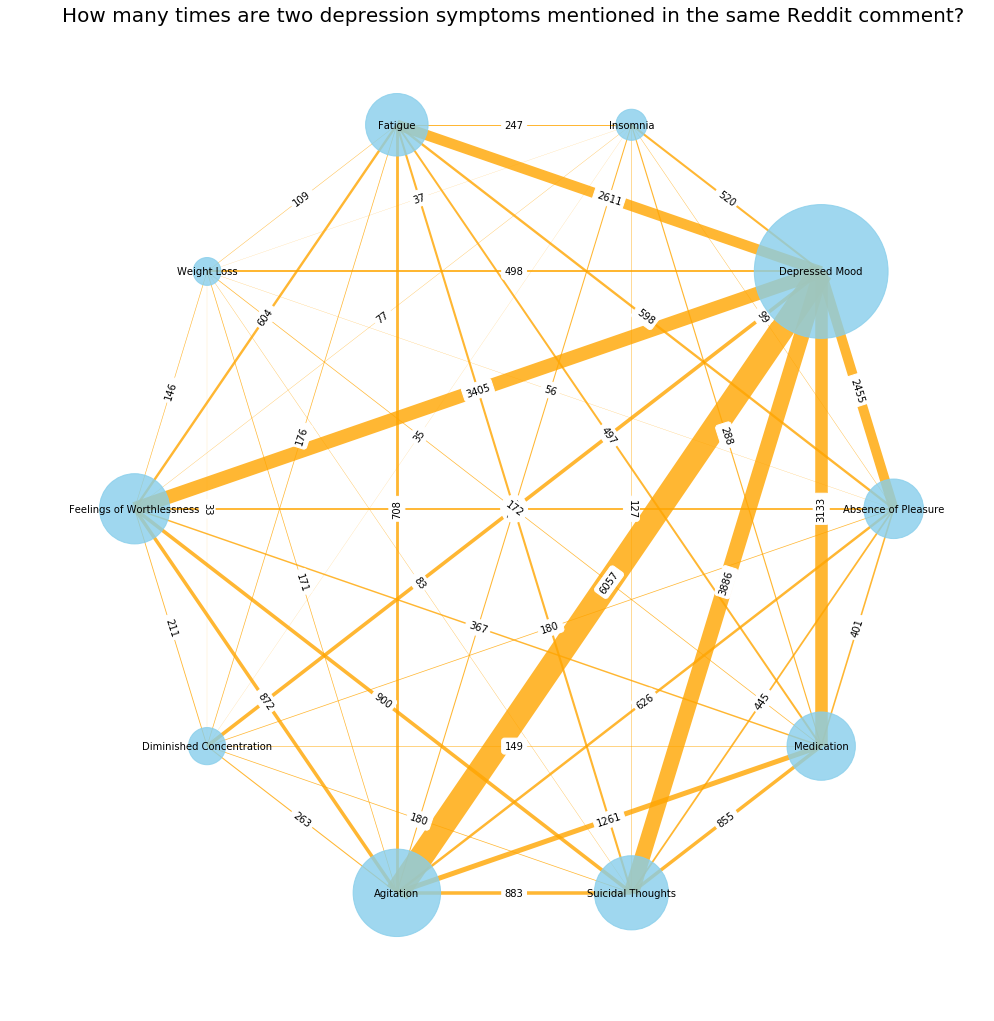

In [588]:
options = {
...     'node_color': 'red',
...     'edge_color': 'blue',
...     'node_size': 1600,
...     'width': 1,
...     'alpha': .5,
... }

sizes = network_symptoms.sum().tolist()

plt.subplots(figsize=(14,14))

pos=nx.circular_layout(G)  # note circular/spring might be more clear

weight = nx.get_edge_attributes(G, 'weight')

edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]
weig = []

for i in weights:
    weig.append(i*0.004)
    
nx.draw_networkx_labels(G, pos,font_size=10, font_family='sans-serif')
nx.draw(G, pos, node_size = sizes, width=weig, edge_color = 'orange', node_color = 'skyblue', alpha = 0.8)
nx.draw_networkx_edge_labels(G, pos, edge_labels = weight)

plt.tight_layout()
plt.margins(x=0.1, y=0.1)
plt.axis('off');
plt.title('How many times are two depression symptoms mentioned in the same Reddit comment?', fontsize = 20);

In [612]:
print(sizes)
list(G)

[3548, 17903, 967, 3912, 778, 4938, 1383, 7653, 5505, 4673]


In [657]:
# weighted network - NOTE IT IS NOT POSSIBLE AS IF INSOMIA TO FATIGUE IS 50% FATIGUE TO INSOMNIA MAY BE 10% SO IT DOESN'T WORK
    
S1 = sorted(final_df['S1'].tolist())

S1_total = []
for i in S1:
    S1_total.append(sizes[i-1])


weight2 = [(x/y)*20 for x, y in zip(weights, S1_total)]

# Whole Twitter dataset with 1s in table (intead of counts)

In [200]:
df.head()

,Absence of pleasure,Depressed mood,Insomnia,Fatigue,Weight loss,Feelings of worthlessness,Diminished concentration,Agitation,Suicidal thoughts,Date,ID,Month,Week,Season
0,0,0,0,7,0,0,0,0,0,2016-03-30 18:11:43,5.983516e+08,3,13,Spring
1,0,0,0,1,0,0,0,0,0,2016-02-27 21:17:34,2.314724e+09,2,8,Winter
2,0,0,0,1,0,0,0,0,0,2016-01-05 14:36:51,1.717906e+08,1,1,Winter
3,0,0,0,0,0,1,0,0,0,2016-09-06 02:40:38,3.445366e+08,9,36,Autumn
4,0,0,0,1,0,0,0,0,0,2016-06-29 12:43:26,6.066649e+08,6,26,Summer


In [204]:
symptoms = df.iloc[:,0:8] # create table for symptoms
symptoms = symptoms.astype(bool).astype(int)
x = df.iloc[:,8:]
df2 = pd.concat([symptoms, x], axis=1)

df2['Date'] = pd.to_datetime(df2['Date']) # convert to datetime
df2['Month'] = df2['Date'].map(lambda x: x.month) # create column for month
df2.head()

,Absence of pleasure,Depressed mood,Insomnia,Fatigue,Weight loss,Feelings of worthlessness,Diminished concentration,Agitation,Suicidal thoughts,Date,ID,Month,Week,Season
0,0,0,0,1,0,0,0,0,0,2016-03-30 18:11:43,5.983516e+08,3,13,Spring
1,0,0,0,1,0,0,0,0,0,2016-02-27 21:17:34,2.314724e+09,2,8,Winter
2,0,0,0,1,0,0,0,0,0,2016-01-05 14:36:51,1.717906e+08,1,1,Winter
3,0,0,0,0,0,1,0,0,0,2016-09-06 02:40:38,3.445366e+08,9,36,Autumn
4,0,0,0,1,0,0,0,0,0,2016-06-29 12:43:26,6.066649e+08,6,26,Summer


In [205]:
df2.sum()

Absence of pleasure                                                      29157
Depressed mood                                                           94145
Insomnia                                                                 15534
Fatigue                                                                 120378
Weight loss                                                               6605
Feelings of worthlessness                                                57499
Diminished concentration                                                 19680
Agitation                                                                50497
Suicidal thoughts                                                        19305
ID                                                                 3.96388e+14
Month                                                                  2383921
Week                                                                   9700196
Season                       SpringWinterWinterAutum

In [10]:
df.sum()

Absence of pleasure          2.994900e+04
Depressed mood               9.754800e+04
Insomnia                     1.588100e+04
Fatigue                      1.331450e+05
Weight loss                  6.883000e+03
Feelings of worthlessness    5.875300e+04
Diminished concentration     2.000000e+04
Agitation                    5.408000e+04
Suicidal thoughts            1.930500e+04
Medication                   5.099000e+03
ID                           3.963878e+14
Month                        2.383921e+06
dtype: float64

In [11]:
months = df2.groupby('Month').sum()
months = months.iloc[:,0:10]

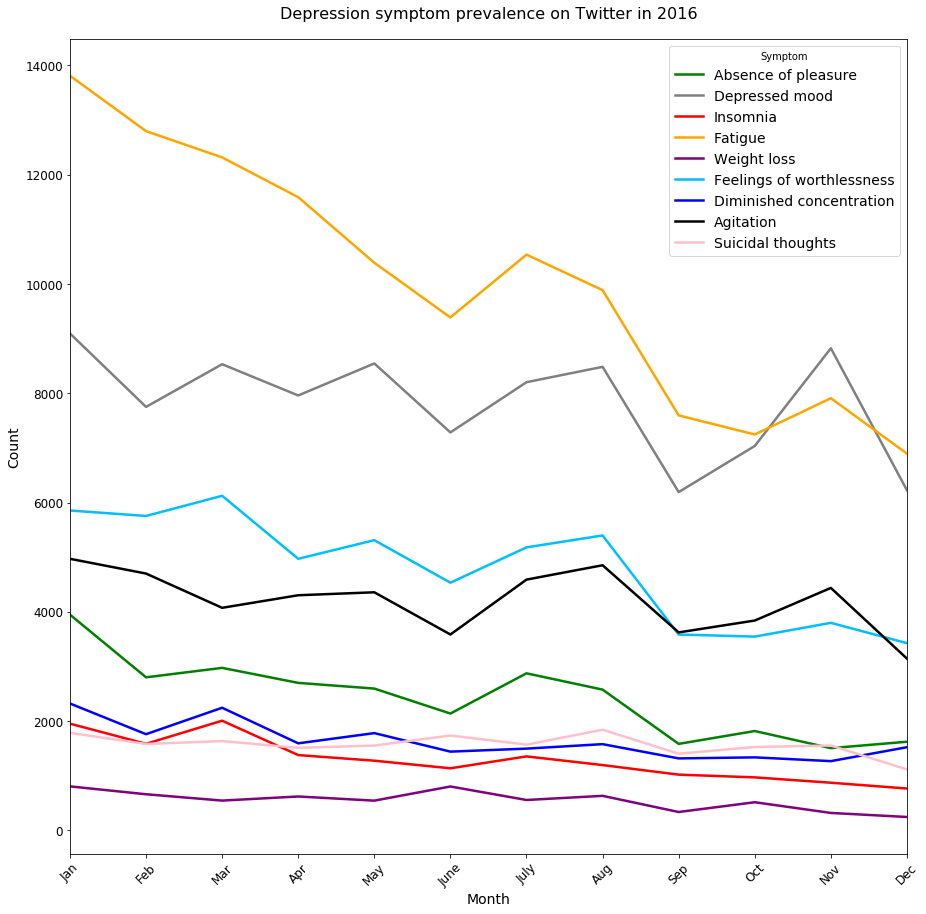

In [12]:
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# set figure
fig, ax = plt.subplots(figsize=(15, 15))

# set plot 
ax.plot(months["Absence of pleasure"], color = 'g', linewidth = 2.5)
ax.plot(months["Depressed mood"], color = 'grey', linewidth = 2.5)
ax.plot(months["Insomnia"], color = 'r', linewidth = 2.5)
ax.plot(months["Fatigue"], color = 'orange', linewidth = 2.5)
ax.plot(months["Weight loss"], color = 'purple', linewidth = 2.5)
ax.plot(months["Feelings of worthlessness"], color = 'deepskyblue', linewidth = 2.5)
ax.plot(months["Diminished concentration"], color = 'blue', linewidth = 2.5)
ax.plot(months["Agitation"], color = 'black', linewidth = 2.5)
ax.plot(months["Suicidal thoughts"], color = 'pink', linewidth = 2.5)
#ax.plot(months["Medication"], color = 'brown', linewidth = 2.5)

# set lables
ax.set_xlim([1,12])
ax.legend(title = 'Symptom', fontsize = 14)
ax.set_title('Depression symptom prevalence on Twitter in 2016', pad = 20, fontsize = 16)
ax.set_xlabel('Month', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ticks = np.arange(1,13,1)
labels = [i for i in month]
ax.set_xticks(ticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(labels, rotation=45);

In [13]:
df2['Week'] = df2['Date'].map(lambda x: x.week) # create column for week

In [14]:
weeks = df2.groupby('Week').sum()
weeks = weeks.iloc[:,0:10]

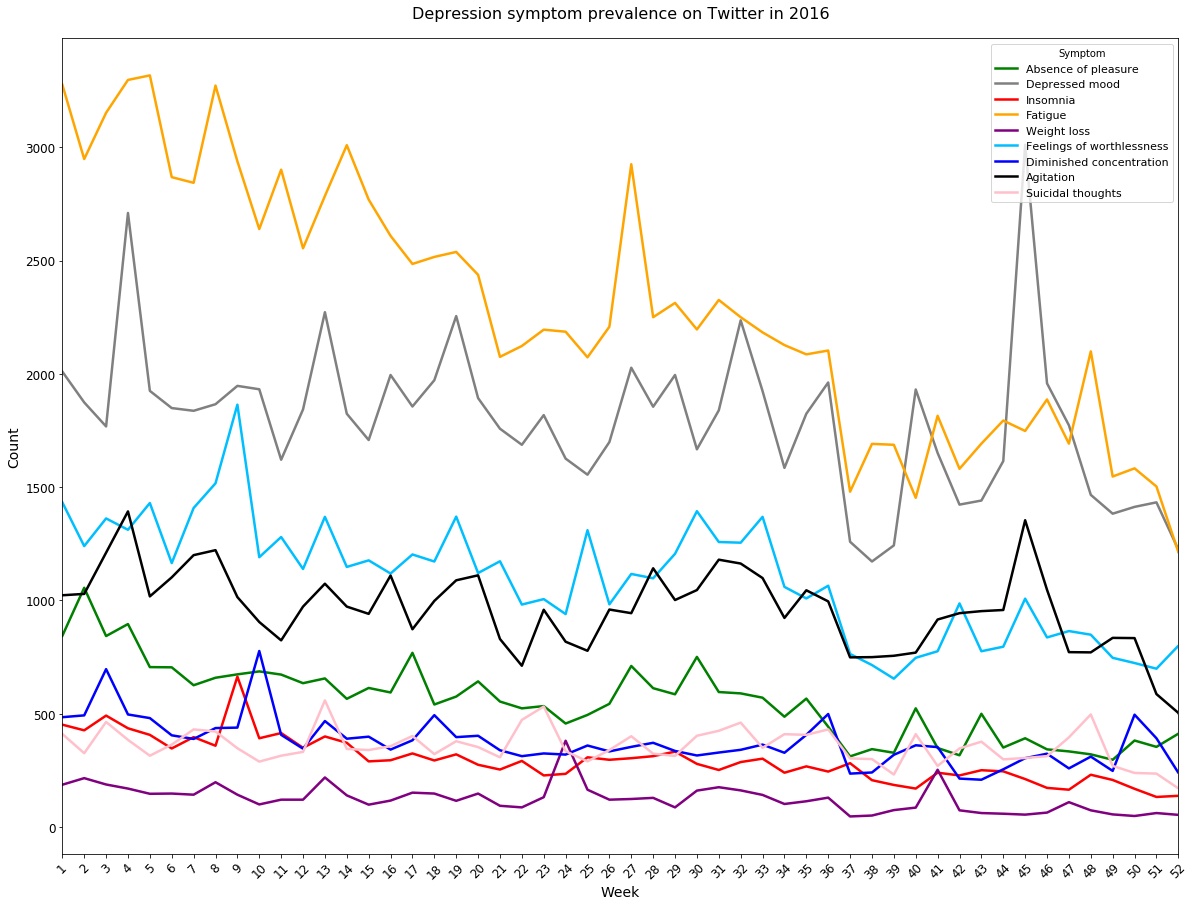

In [15]:
week = list(range(1,53))

# set figure
fig, ax = plt.subplots(figsize=(20, 15))

# set plot 
ax.plot(weeks["Absence of pleasure"], color = 'g', linewidth = 2.5)
ax.plot(weeks["Depressed mood"], color = 'grey', linewidth = 2.5)
ax.plot(weeks["Insomnia"], color = 'r', linewidth = 2.5)
ax.plot(weeks["Fatigue"], color = 'orange', linewidth = 2.5)
ax.plot(weeks["Weight loss"], color = 'purple', linewidth = 2.5)
ax.plot(weeks["Feelings of worthlessness"], color = 'deepskyblue', linewidth = 2.5)
ax.plot(weeks["Diminished concentration"], color = 'blue', linewidth = 2.5)
ax.plot(weeks["Agitation"], color = 'black', linewidth = 2.5)
ax.plot(weeks["Suicidal thoughts"], color = 'pink', linewidth = 2.5)
#ax.plot(weeks["Medication"], color = 'brown', linewidth = 2.5)

# set lables
ax.set_xlim([1,52])
ax.legend(title = 'Symptom', fontsize = 11)
ax.set_title('Depression symptom prevalence on Twitter in 2016', pad = 20, fontsize = 16)
ax.set_xlabel('Week', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ticks = np.arange(1,53,1)
labels = [i for i in week]
ax.set_xticks(ticks)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xticklabels(labels, rotation=45);

In [18]:
# get the number of rows where there are more than 2 symptoms
symptoms = df2.iloc[:,0:10] # create table for symptoms
symptoms = symptoms.astype(bool).astype(int) # convert all non-zeros to 1
symptoms['sum'] = symptoms.sum(axis=1) 
index = symptoms['sum']>=2 
network_symptoms = symptoms[index] 
network_symptoms = network_symptoms.iloc[:,0:10]
network_symptoms.sum()

Absence of pleasure          2295
Depressed mood               9738
Insomnia                     2290
Fatigue                      6119
Weight loss                   568
Feelings of worthlessness    2010
Diminished concentration      845
Agitation                    7314
Suicidal thoughts            1918
Medication                    743
dtype: int64

In [19]:
# gives the prevalence of each symptom
symptoms.sum()

Absence of pleasure           29157
Depressed mood                94145
Insomnia                      15534
Fatigue                      120378
Weight loss                    6605
Feelings of worthlessness     57499
Diminished concentration      19680
Agitation                     50497
Suicidal thoughts             18829
Medication                     4932
sum                          417256
dtype: int64

In [20]:
temp=[]
for row in network_symptoms.iterrows():
    index, data = row
    temp.append(data.tolist())

temp2 = []
for l in temp:
    data = [i+1 for i,x in enumerate(l) if x == 1]
    temp2.append(data)

temp2[0:5]

[[1, 3, 4], [2, 8], [2, 5], [2, 8], [4, 8]]

In [21]:
from itertools import combinations
from collections import Counter

count = Counter()

for sublist in temp2:
    count.update(Counter(combinations(sublist, 2)))

print(count)

Counter({(2, 8): 5632, (2, 4): 1687, (3, 4): 1514, (1, 4): 1271, (2, 9): 1109, (4, 8): 853, (2, 6): 666, (4, 6): 664, (1, 2): 510, (8, 9): 383, (3, 8): 303, (2, 10): 287, (2, 3): 277, (6, 8): 269, (4, 9): 251, (2, 7): 239, (8, 10): 237, (1, 8): 231, (2, 5): 220, (6, 9): 167, (1, 6): 153, (4, 7): 151, (7, 8): 142, (5, 7): 116, (3, 9): 108, (1, 3): 95, (6, 7): 95, (3, 10): 89, (1, 7): 86, (5, 8): 85, (4, 5): 80, (4, 10): 80, (9, 10): 55, (5, 9): 53, (3, 6): 52, (3, 7): 49, (1, 9): 46, (5, 6): 38, (6, 10): 37, (3, 5): 29, (5, 10): 25, (1, 10): 22, (7, 9): 21, (1, 5): 17, (7, 10): 11})


In [22]:
final_df = pd.DataFrame.from_dict(count, orient='index').reset_index()
final_df.columns = ['tuple', 'count']

final_df[['S1', 'S2']] = pd.DataFrame(final_df['tuple'].tolist(), index=final_df.index)
final_df= final_df[['S1', 'S2', 'count']].sort_values('count', ascending=False)
final_df.head()

,S1,S2,count
3,2,8,5632
6,2,4,1687
2,3,4,1514
1,1,4,1271
7,2,9,1109


In [23]:
import networkx as nx

# create the graph by adding edges one by one
G = nx.Graph()
#G.add_nodes_from(symptoms_lst)

for index, row in final_df.iterrows():
    G.add_edge(row['S1'], row['S2'], weight=row['count'])

#print(G.degree())

# remove isolated vertices (if any)    
#remove = [node for node,degree in G.degree() if degree ==0]
#G.remove_nodes_from(remove)


mapping={1:'Absence of Pleasure', 2:'Depressed Mood', 3:'Insomnia', 4:'Fatigue', 5:'Weight Loss',
         6:'Feelings of Worthlessness', 7:'Diminished Concentration', 8: 'Agitation', 9: 'Suicidal Thoughts',
        10: 'Medication'}
G = nx.relabel_nodes(G,mapping, copy = False)

print(list(G))

['Absence of Pleasure', 'Depressed Mood', 'Insomnia', 'Fatigue', 'Weight Loss', 'Feelings of Worthlessness', 'Diminished Concentration', 'Agitation', 'Suicidal Thoughts', 'Medication']


In [24]:
# graph size
print("graph has %d nodes with %d edges" % (nx.number_of_nodes(G), nx.number_of_edges(G)))
print(nx.number_connected_components(G), "connected components")

# connected components
gsizes = [nx.number_of_nodes(glen) for glen in nx.connected_component_subgraphs(G)]
print("G connected component sizes:", sorted(gsizes, reverse=True))

graph has 10 nodes with 45 edges
1 connected components
G connected component sizes: [10]


C:\Paresh\Anaconda1\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


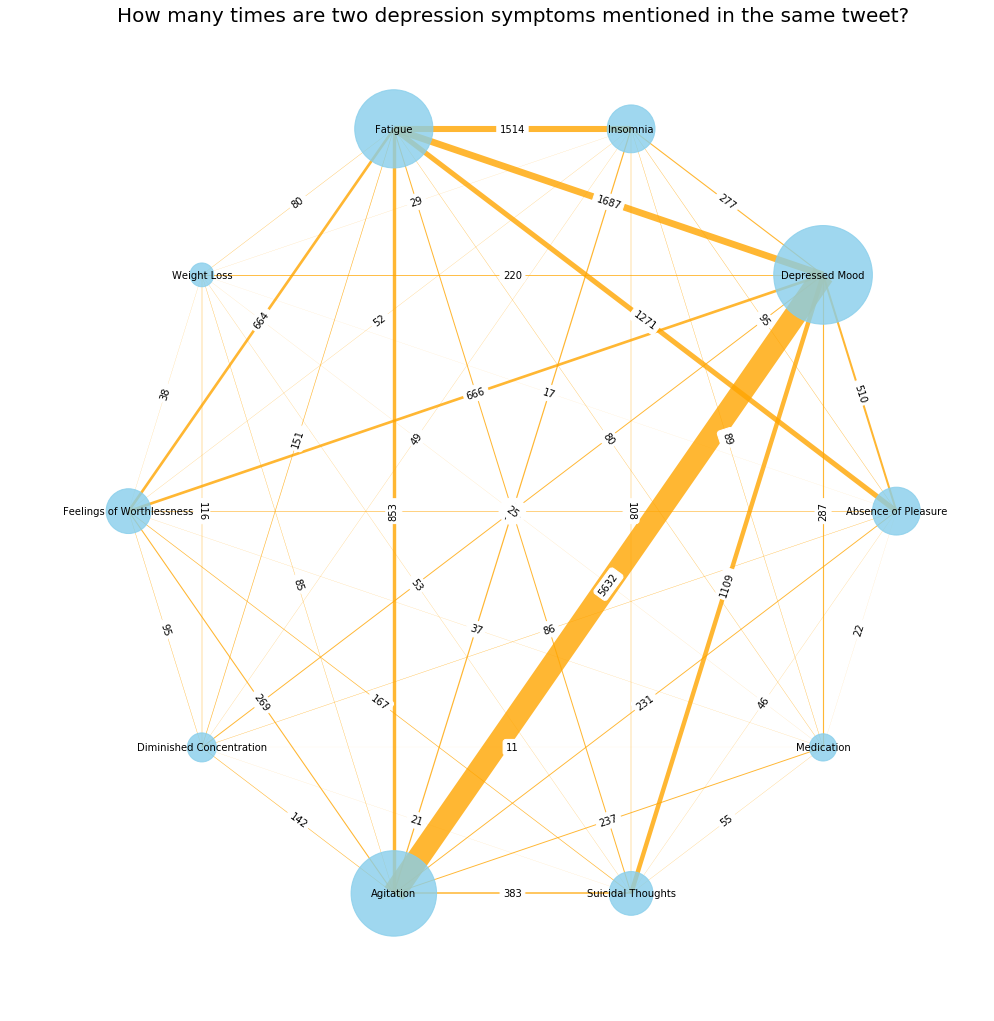

In [25]:
options = {
...     'node_color': 'red',
...     'edge_color': 'blue',
...     'node_size': 1600,
...     'width': 1,
...     'alpha': .5,
... }

sizes = network_symptoms.sum().tolist()

plt.subplots(figsize=(14,14))

pos=nx.circular_layout(G)  # note circular/spring might be more clear

weight = nx.get_edge_attributes(G, 'weight')

edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]
weig = []

for i in weights:
    weig.append(i*0.004)
    
nx.draw_networkx_labels(G, pos,font_size=10, font_family='sans-serif')
nx.draw(G, pos, node_size = sizes, width=weig, edge_color = 'orange', node_color = 'skyblue', alpha = 0.8)
nx.draw_networkx_edge_labels(G, pos, edge_labels = weight)

plt.tight_layout()
plt.margins(x=0.1, y=0.1)
plt.axis('off');
plt.title('How many times are two depression symptoms mentioned in the same tweet?', fontsize = 20);

In [ ]:
print(sizes)
list(G)

In [ ]:
# save all the dfs to disk
# do % comparison and rank comparison
# could do what % of each symptoms interaction with all symptoms is just for that symptom

# Scatter plot 

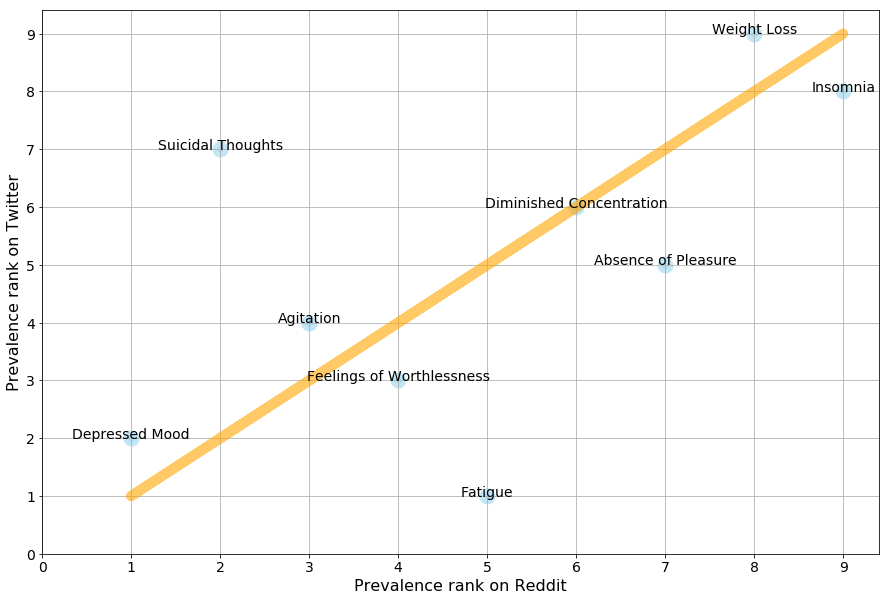

In [55]:
from sklearn.linear_model import LinearRegression


data = [['Absence of Pleasure',7,5], ['Depressed Mood',1,2], ['Insomnia', 9,8], ['Fatigue',5,1], ['Weight Loss',8,9],
        ['Feelings of Worthlessness',4,3],['Diminished Concentration',6,6],['Agitation',3,4],['Suicidal Thoughts',2,7]] 

perf_data = [['Absence of Pleasure',7,7], ['Depressed Mood',1,1], ['Insomnia', 9,9], ['Fatigue',5,5], ['Weight Loss',8,8],
        ['Feelings of Worthlessness',4,4],['Diminished Concentration',6,6],['Agitation',3,3],['Suicidal Thoughts',2,2]]
 
df = pd.DataFrame(data, columns = ['Symptom', 'Reddit', 'Twitter']) 
df2 = pd.DataFrame(perf_data, columns = ['Symptom', 'Reddit', 'Twitter']) 

X = df2.iloc[:, 1].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df2.iloc[:, 2].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(df['Reddit'], df['Twitter'], linewidths=10, color = 'skyblue', alpha=0.5)
ax.plot(X, Y_pred, color='orange', linewidth=10, alpha = 0.6)
ax.grid()

# set lables
ax.set_xlabel('Prevalence rank on Reddit', fontsize = 16)
ax.set_ylabel('Prevalence rank on Twitter', fontsize = 16)
ax.tick_params(axis='both', which='major', labelsize=14)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks);

for i, txt in enumerate(df['Symptom']):
    ax.annotate(txt, (df['Reddit'][i], df['Twitter'][i]), fontsize = 14, horizontalalignment='center')

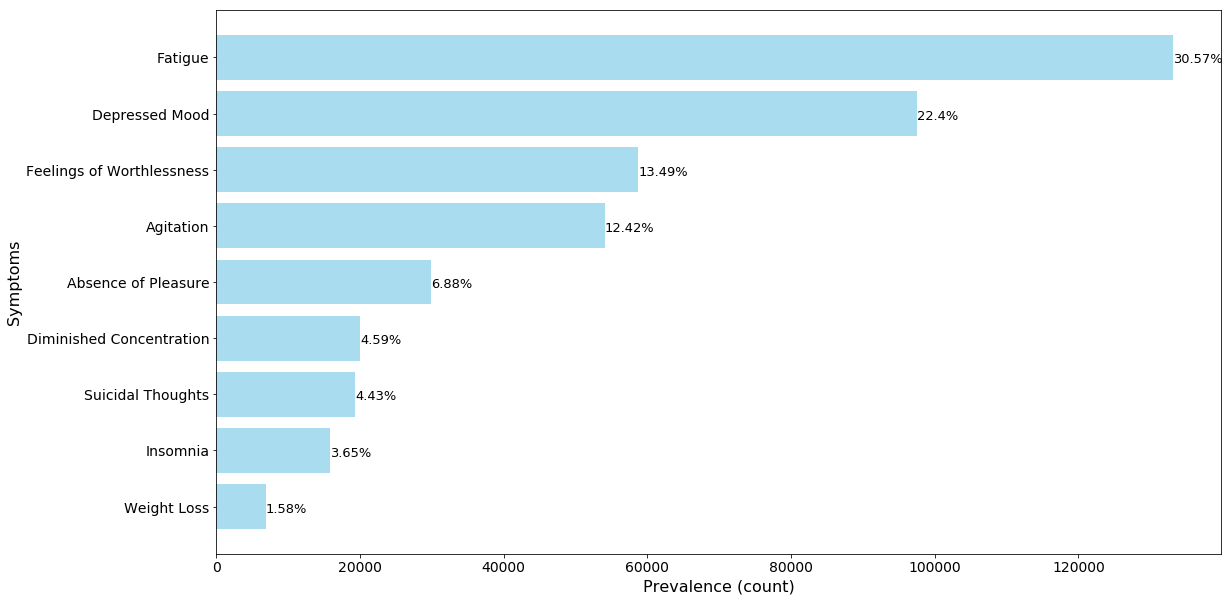

In [211]:
y =  ['Fatigue', 'Depressed Mood', 'Feelings of Worthlessness', 'Agitation', 'Absence of Pleasure', 'Diminished Concentration',
      'Suicidal Thoughts', 'Insomnia', 'Weight Loss']
      
x = [133145, 97548, 58753, 54080, 29949, 20000, 19305, 15881, 6883]

z = ['44.03%', '32.26%', '19.43%', '17.88%', '9.90%', '6.61%', '6.38%', '5.25%', '2.28%']

fig, ax = plt.subplots(figsize=(18, 10))  

y_pos = np.arange(len(y))
ax.barh(y_pos, x, color= 'skyblue', alpha = 0.7)

ax.set_xlabel('Prevalence (count)', fontsize = 16)
ax.set_ylabel('Symptoms', fontsize = 16)
 
plt.yticks(y_pos, y)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.invert_yaxis()


for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), i.get_y()+0.5, str(round((i.get_width()/sum(x))*100, 2))+'%', fontsize=13);
    
    

